In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder, playbyplay, winprobabilitypbp
from nba_api.stats.library.parameters import Season, SeasonType

In [2]:
df_2122 = pd.read_csv("choke_list_2122.csv")
df_2021 = pd.read_csv("choke_list_2021.csv")
df_1920 = pd.read_csv("choke_list_1920.csv")

In [3]:
df = df_2122.append(df_2021)
df = df.append(df_1920).reset_index()
df.head()

,index,game_id,season,home_team,away_team,home_choke
0,0,22100137,2021-22,PHX,ATL,0.0
1,1,22100190,2021-22,CLE,BOS,0.0
2,2,22100098,2021-22,BOS,CHI,1.0
3,3,22100041,2021-22,CHA,BOS,1.0
4,4,22100253,2021-22,CLE,BKN,1.0


In [31]:
df.shape[0]

240

In [5]:
df2 = pd.DataFrame({"team": np.unique(df["home_team"].append(df["away_team"])), "chokes": np.zeros(30), "comebacks": np.zeros(30)}).set_index("team")
df2.loc["PHX", "chokes"]

0.0

In [9]:
for i in range(df.shape[0]):
    row = df.loc[i]
    if row.home_choke == 1.0:
        df2.loc[row.home_team, "chokes"] += 1
        df2.loc[row.away_team, "comebacks"] += 1
    else:
        df2.loc[row.home_team, "comebacks"] += 1
        df2.loc[row.away_team, "chokes"] += 1
df2 = df2.reset_index()

In [16]:
df2

,team,chokes,comebacks
0,ATL,15.0,33.0
1,BKN,21.0,30.0
2,BOS,24.0,27.0
3,CHA,33.0,33.0
4,CHI,27.0,21.0
5,CLE,27.0,21.0
6,DAL,24.0,18.0
7,DEN,24.0,51.0
8,DET,24.0,9.0
9,GSW,15.0,27.0


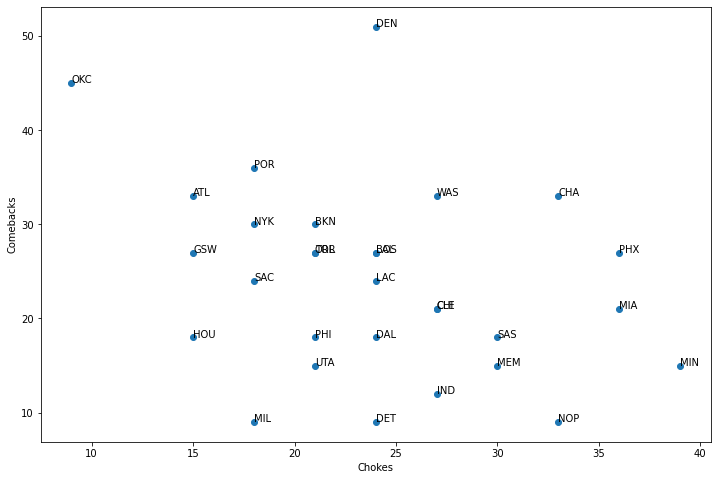

In [24]:
plt.figure(figsize=(12,8))
plt.scatter(df2.chokes, df2.comebacks)
for idx, row in df2.iterrows():
    plt.annotate(row.team, (row.chokes, row.comebacks))
plt.xlabel("Chokes")
plt.ylabel("Comebacks")
plt.show()